In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 8

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/35 [..............................] - ETA: 7s - loss: 2.3484 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 2.1131 - accuracy: 0.1176 - val_loss: 1.8996 - val_accuracy: 0.2919
Epoch 2/1000
 1/35 [..............................] - ETA: 0s - loss: 1.9318 - accuracy: 0.2344
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1.8575 - accuracy: 0.2769 - val_loss: 1.6949 - val_accuracy: 0.3689
Epoch 3/1000
 1/35 [..............................] - ETA: 0s - loss: 1.7797 - accuracy: 0.3203
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1.6839 - accuracy: 0.3544 - val_loss: 1.5292 - val_accuracy: 0.3885
Epoch 4/1000
 1/35 [..............................] - ETA: 0s - loss: 1.6996 - accuracy: 0.3516
E

/Users/jolson/source/sandbox/mp-gesture-recognition/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 0s 1ms/step - loss: 1.4987 - accuracy: 0.3930 - val_loss: 1.3510 - val_accuracy: 0.4696
Epoch 6/1000
 1/35 [..............................] - ETA: 0s - loss: 1.4866 - accuracy: 0.3906
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1.4335 - accuracy: 0.4229 - val_loss: 1.2896 - val_accuracy: 0.5331
Epoch 7/1000
 1/35 [..............................] - ETA: 0s - loss: 1.3894 - accuracy: 0.5000
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1.3843 - accuracy: 0.4385 - val_loss: 1.2316 - val_accuracy: 0.5770
Epoch 8/1000
 1/35 [..............................] - ETA: 0s - loss: 1.3953 - accuracy: 0.4453
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1.3339 - accuracy: 0.4547 - val_loss

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 454us/step - loss: 0.1933 - accuracy: 0.9412


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 41ms/step
[8.8082980e-03 9.9046457e-01 3.2489507e-07 6.9437345e-04 8.1502674e-07
 5.5374000e-10 3.1553642e-05 3.6598366e-14]
1


# Confusion matrix

47/47 [==============================] - 0s 442us/step


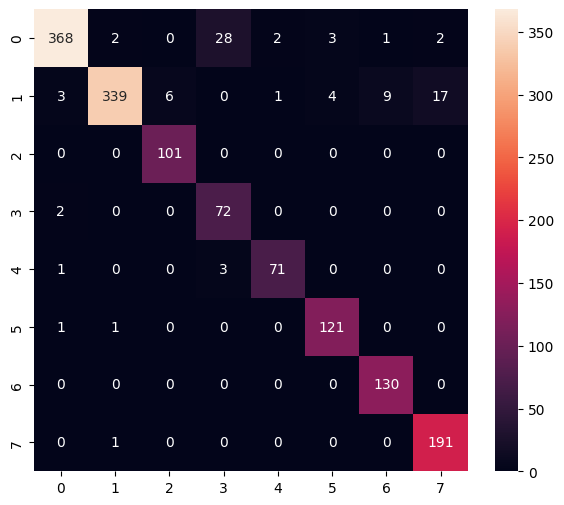

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       406
           1       0.99      0.89      0.94       379
           2       0.94      1.00      0.97       101
           3       0.70      0.97      0.81        74
           4       0.96      0.95      0.95        75
           5       0.95      0.98      0.96       123
           6       0.93      1.00      0.96       130
           7       0.91      0.99      0.95       192

    accuracy                           0.94      1480
   macro avg       0.92      0.96      0.94      1480
weighted avg       0.95      0.94      0.94      1480



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/jolson/source/sandbox/mp-gesture-recognition/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpj2pbzjmw/assets


INFO:tensorflow:Assets written to: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpj2pbzjmw/assets
2024-05-07 22:14:25.019939: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-07 22:14:25.019968: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-07 22:14:25.020292: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpj2pbzjmw
2024-05-07 22:14:25.020965: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-07 22:14:25.020970: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpj2pbzjmw
2024-05-07 22:14:25.022554: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-05-07 22:14:25.023312: I tensorflow/cc/saved_model/load

6720

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 114 µs, sys: 59 µs, total: 173 µs
Wall time: 161 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.8082980e-03 9.9046457e-01 3.2489476e-07 6.9437281e-04 8.1502679e-07
 5.5374211e-10 3.1553700e-05 3.6598369e-14]
1
